## week3授業課題　信用情報の分析

In [4]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import pandas as pd
import seaborn as sns

# 【問題1】コンペティション内容の把握


#Home Creditはどのような企業？

信用履歴が不十分または存在しない人が融資を受けるため、安全な借入体験を提供することにより、銀行のない人々の金融包摂を拡大に努める
主にHome Creditは、電話会社や取引情報などのさまざまな代替データを利用して、クライアントの返済能力を予測しています。

#このコンペティションでは何を予測する？

様々な統計的手法や機械学習手法を使用してクライアントの返済能力の予測を行なっている
債務者の返済能力
0:返済能力のある（信用のある）人 支払が困難なクライアント = クライアントが最初のY回の分割払いの内に少なくとも一回でX日以上延滞していた場合

1:返済能力のない（信用のない）人

#それを予測することで企業が得られるメリットは何？

本来返済可能なクライアントが融資先に融資される（信用のある）人になるためのデータを得る（予測する）

# 【問題2】データの概観の把握


In [5]:
df = pd.read_csv("application_train.csv")

In [6]:
#.head()、.info()、describe()などを使う
display(df.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,24700.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,1.0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,35698.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,6750.0,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,29686.5,...,0,0,0,0,NaN,NaN,NaN,NaN,NaN,NaN
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,21865.5,...,0,0,0,0,0.0,0.0,0.0,0.0,0.0,0.0


In [7]:
df.shape

(307511, 122)

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Columns: 122 entries, SK_ID_CURR to AMT_REQ_CREDIT_BUREAU_YEAR
dtypes: float64(65), int64(41), object(16)
memory usage: 286.2+ MB


In [9]:
df.describe()

,SK_ID_CURR,TARGET,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,AMT_ANNUITY,AMT_GOODS_PRICE,REGION_POPULATION_RELATIVE,DAYS_BIRTH,DAYS_EMPLOYED,...,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_WEEK,AMT_REQ_CREDIT_BUREAU_MON,AMT_REQ_CREDIT_BUREAU_QRT,AMT_REQ_CREDIT_BUREAU_YEAR
count,307511.000000,307511.000000,307511.000000,3.075110e+05,3.075110e+05,307499.000000,3.072330e+05,307511.000000,307511.000000,307511.000000,...,307511.000000,307511.000000,307511.000000,307511.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000,265992.000000
mean,278180.518577,0.080729,0.417052,1.687979e+05,5.990260e+05,27108.573909,5.383962e+05,0.020868,-16036.995067,63815.045904,...,0.008130,0.000595,0.000507,0.000335,0.006402,0.007000,0.034362,0.267395,0.265474,1.899974
std,102790.175348,0.272419,0.722121,2.371231e+05,4.024908e+05,14493.737315,3.694465e+05,0.013831,4363.988632,141275.766519,...,0.089798,0.024387,0.022518,0.018299,0.083849,0.110757,0.204685,0.916002,0.794056,1.869295
min,100002.000000,0.000000,0.000000,2.565000e+04,4.500000e+04,1615.500000,4.050000e+04,0.000290,-25229.000000,-17912.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,189145.500000,0.000000,0.000000,1.125000e+05,2.700000e+05,16524.000000,2.385000e+05,0.010006,-19682.000000,-2760.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,278202.000000,0.000000,0.000000,1.471500e+05,5.135310e+05,24903.000000,4.500000e+05,0.018850,-15750.000000,-1213.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
75%,367142.500000,0.000000,1.000000,2.025000e+05,8.086500e+05,34596.000000,6.795000e+05,0.028663,-12413.000000,-289.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000
max,456255.000000,1.000000,19.000000,1.170000e+08,4.050000e+06,258025.500000,4.050000e+06,0.072508,-7489.000000,365243.000000,...,1.000000,1.000000,1.000000,1.000000,4.000000,9.000000,8.000000,27.000000,261.000000,25.000000


In [10]:
#欠損値の有無を見る
#sum()メソッドと組み合わせることで、欠損している要素数を列ごとに調べることができる
df.isnull().sum().head()

SK_ID_CURR            0
TARGET                0
NAME_CONTRACT_TYPE    0
CODE_GENDER           0
FLAG_OWN_CAR          0
dtype: int64

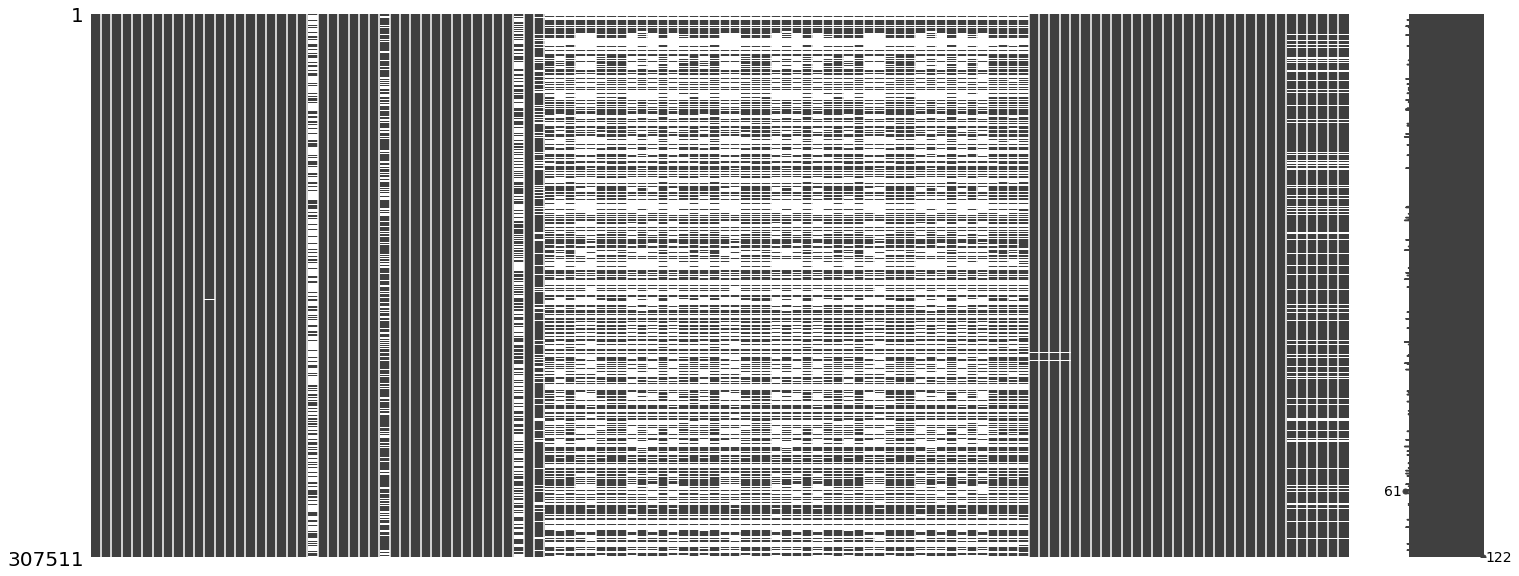

In [11]:
import missingno as msno
msno.matrix(df);

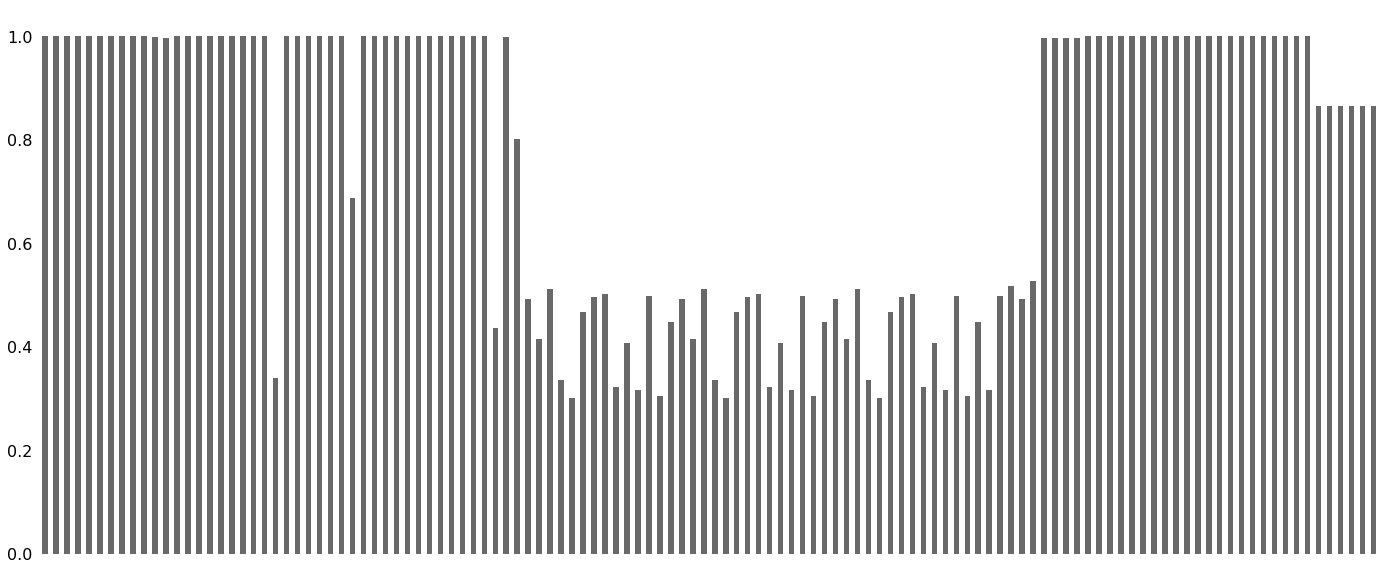

In [12]:
msno.bar(df);

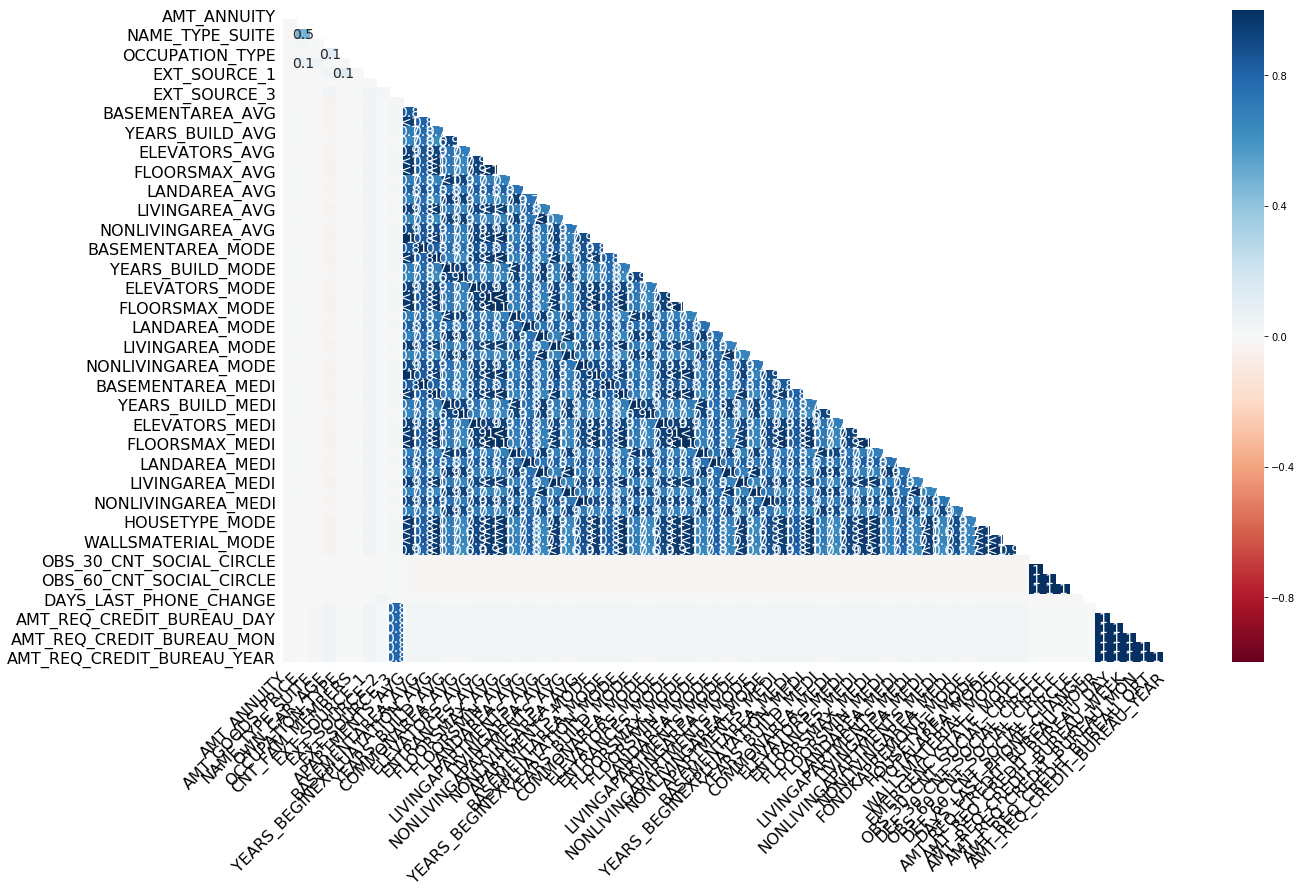

In [13]:
msno.heatmap(df);

In [14]:
##クラスごとのデータ数をグラフに出す
df.iloc[: , 1].head()

0    1
1    0
2    0
3    0
4    0
Name: TARGET, dtype: int64

In [15]:
df_target = df.iloc[: , 1]

In [16]:
count_0 = df_target[df_target == 0].count()
count_1 = df_target[df_target == 1].count()

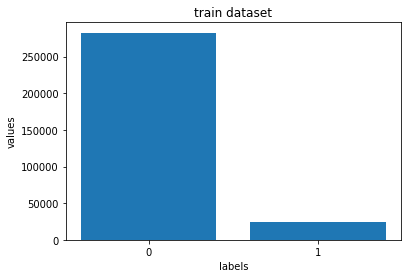

In [17]:
count_sum = []
count_sum.append(count_0)
count_sum.append(count_1)

plt.bar( np.unique(df_target) ,count_sum)
plt.xticks([0 , 1])
plt.title("train dataset")
plt.xlabel("labels")
plt.ylabel("values")
plt.show()

In [18]:
df["TARGET"].value_counts()

0    282686
1     24825
Name: TARGET, dtype: int64

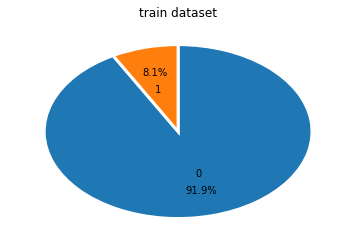

In [19]:
label = ["0" , "1"]
plt.title("train dataset")
plt.pie(df["TARGET"].value_counts(),labels = label , autopct="%1.1f%%" , startangle=90, labeldistance=0.5,
             pctdistance=0.7, wedgeprops={'linewidth': 3, 'edgecolor':"white"},counterclock=False)
plt.show()

それぞれ結果に対する説明や考察も行ってください。

欠損値が多く見られる
また0(信用のある人)の割合が多すぎる。

# 【問題3】課題設定


*クラス０のデータが多すぎる 欠損値が多い（データ量にバラツキがある） 

*特徴量が多い（１２２個）ので似たような特徴量を削る

## 【問題4】データ探索

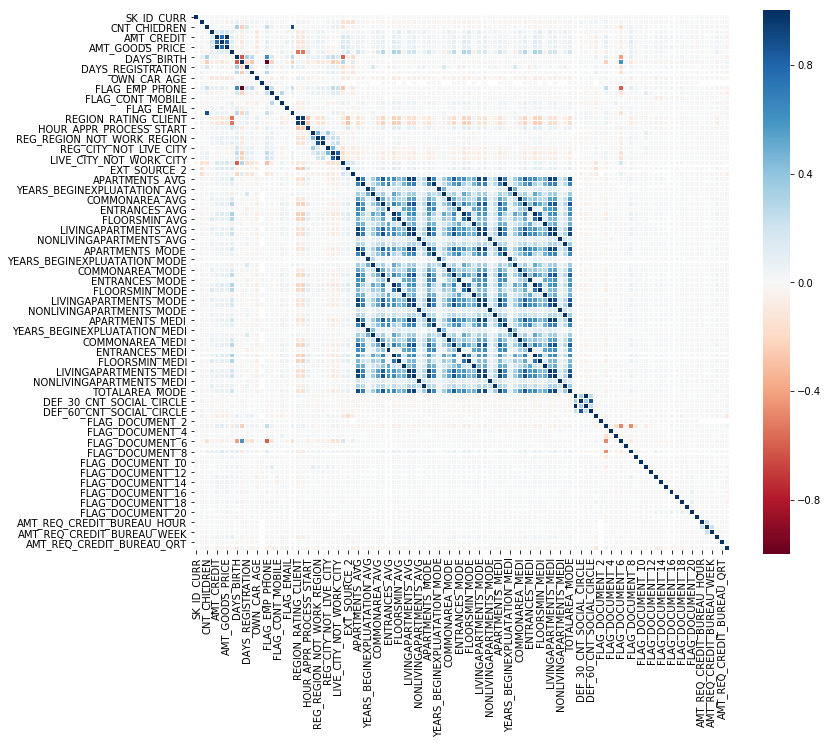

In [20]:
df_corr = df.corr()
colormap = plt.cm.RdBu
plt.figure(figsize=(12, 10))
sns.heatmap(df_corr , square=True , cmap = colormap ,linecolor = "white",
                        vmax = 1 , annot=False, linewidths=0.1)
plt.show()

# 欠損値のある特徴量の列を削除する

In [21]:
total = df.isnull().sum().sort_values(ascending = False)
missing_ratio = (df.isnull().sum() / df.isnull().count()).sort_values(ascending = False)
missing_df = pd.concat([total , missing_ratio] , axis = 1 , keys = ["Total" , "missing_ratio"])

In [22]:
missing_df.head()

,Total,missing_ratio
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330


In [23]:
df_miss = df.dropna(how = "any" , axis =1 )

In [24]:
df_miss.head()

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


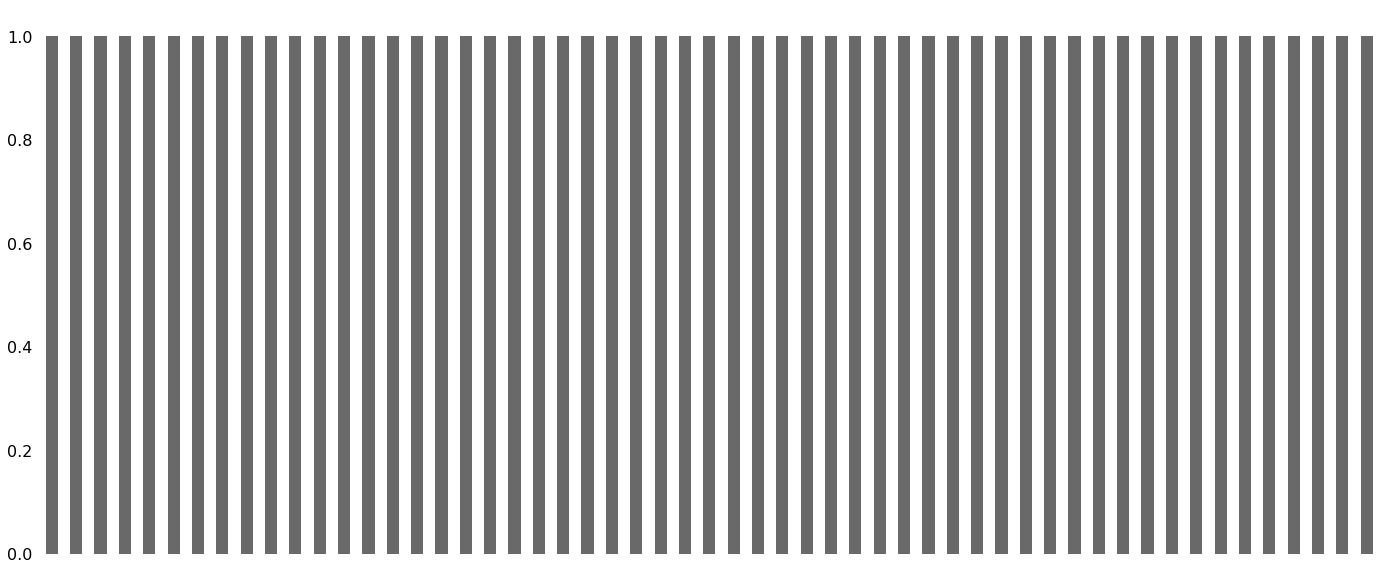

In [25]:
msno.bar(df_miss);

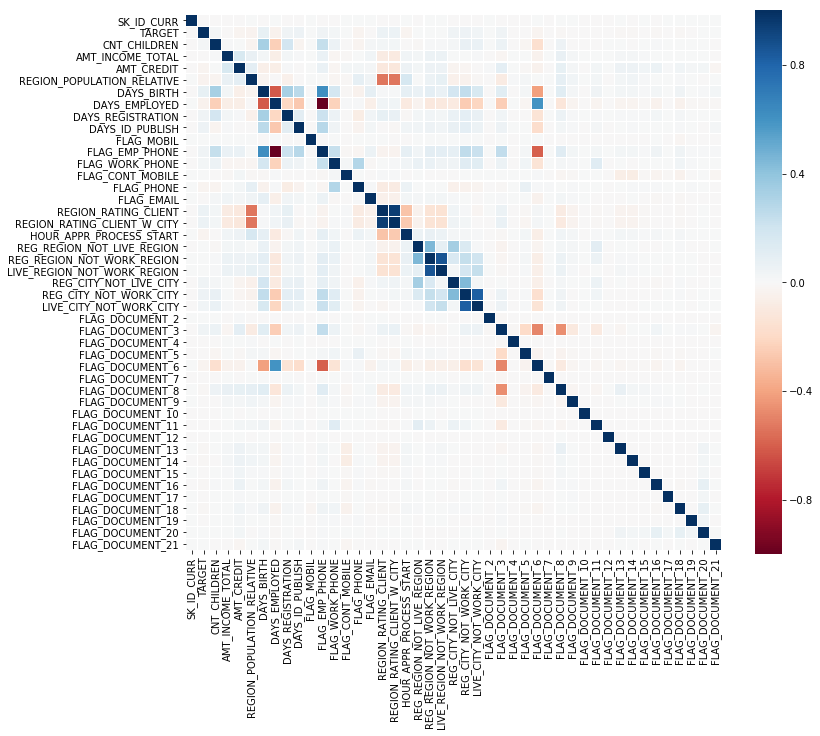

In [26]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12, 10))
sns.heatmap(df_miss.corr() , square=True , cmap = colormap ,linecolor = "white",
                        vmax = 1 , annot=False, linewidths=0.1)
plt.show()

# 欠損値5個以上の特徴量を削除する

In [27]:
df_5 = df.drop((missing_df[missing_df["Total"] > 5]).index , 1)
display(df_5.head())

,SK_ID_CURR,TARGET,NAME_CONTRACT_TYPE,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,AMT_CREDIT,NAME_INCOME_TYPE,...,FLAG_DOCUMENT_12,FLAG_DOCUMENT_13,FLAG_DOCUMENT_14,FLAG_DOCUMENT_15,FLAG_DOCUMENT_16,FLAG_DOCUMENT_17,FLAG_DOCUMENT_18,FLAG_DOCUMENT_19,FLAG_DOCUMENT_20,FLAG_DOCUMENT_21
0,100002,1,Cash loans,M,N,Y,0,202500.0,406597.5,Working,...,0,0,0,0,0,0,0,0,0,0
1,100003,0,Cash loans,F,N,N,0,270000.0,1293502.5,State servant,...,0,0,0,0,0,0,0,0,0,0
2,100004,0,Revolving loans,M,Y,Y,0,67500.0,135000.0,Working,...,0,0,0,0,0,0,0,0,0,0
3,100006,0,Cash loans,F,N,Y,0,135000.0,312682.5,Working,...,0,0,0,0,0,0,0,0,0,0
4,100007,0,Cash loans,M,N,Y,0,121500.0,513000.0,Working,...,0,0,0,0,0,0,0,0,0,0


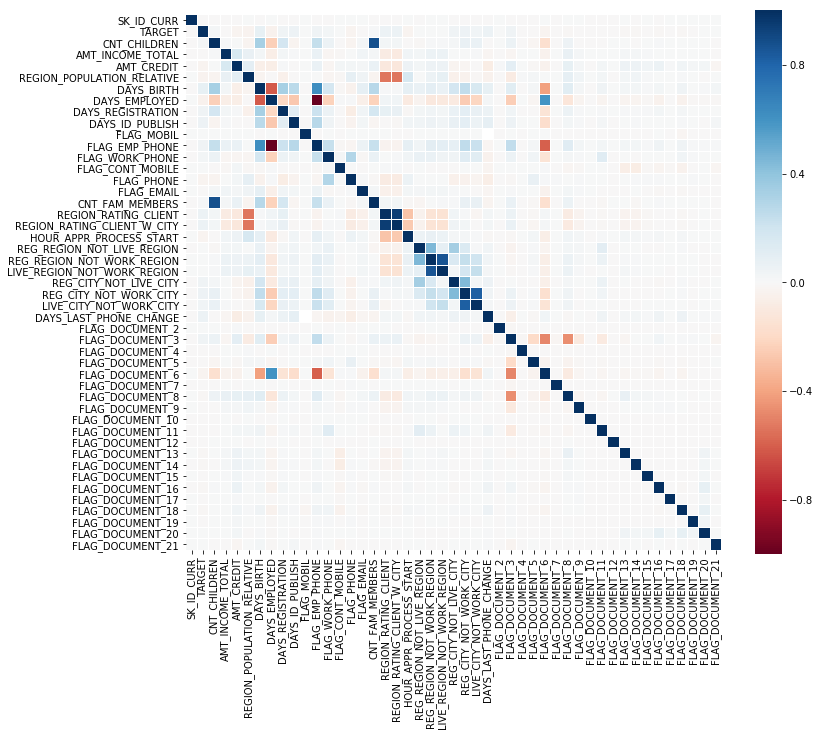

In [28]:
colormap = plt.cm.RdBu
plt.figure(figsize=(12, 10))
sns.heatmap(df_5.corr() , square=True , cmap = colormap ,linecolor = "white",
                        vmax = 1 , annot=False, linewidths=0.1)
plt.show()

# データの概観を見たことを元に、自分なりの課題・疑問を複数設定してください。

欠損値のある特徴量の列を削除してグラフ化したが、TARGETとの相関性の高い特徴量が軒並み削られてしまった。
また５個以上欠損値のある特徴量の列を削除する方法も試したが、特徴量は変わらず差別化には至らなかった。

# TARGETと相関性の高い特徴量を抜き出す

In [29]:
df_c = list(df.corr().columns)
df_s = np.abs(df.corr().iloc[: , 1])

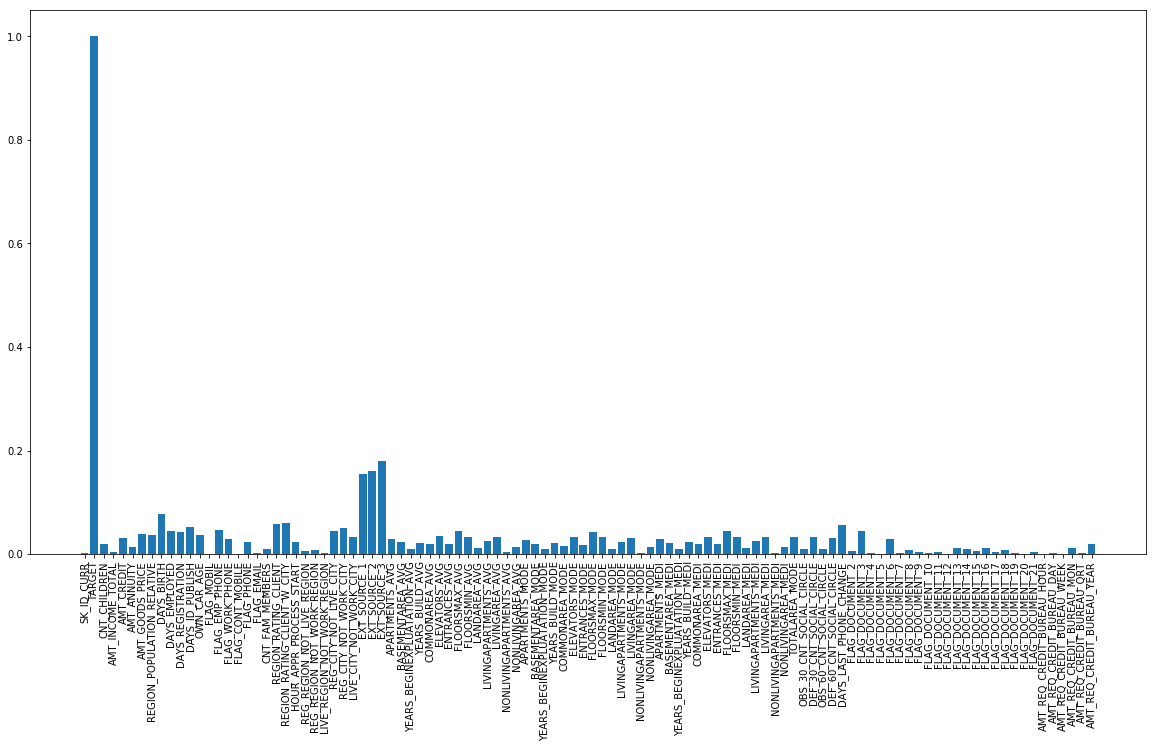

In [30]:
fig = plt.figure(figsize = (20,10))
plt.bar(df_c , df_s)
plt.xticks(rotation = 90)
plt.show()

In [31]:
df_s.sort_values(ascending = False).head(20)

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
FLAG_EMP_PHONE                 0.045982
DAYS_EMPLOYED                  0.044932
REG_CITY_NOT_LIVE_CITY         0.044395
FLAG_DOCUMENT_3                0.044346
FLOORSMAX_AVG                  0.044003
FLOORSMAX_MEDI                 0.043768
FLOORSMAX_MODE                 0.043226
DAYS_REGISTRATION              0.041975
AMT_GOODS_PRICE                0.039645
OWN_CAR_AGE                    0.037612
Name: TARGET, dtype: float64

上記のグラフ,表からEXT_SOURCE(別審査機関のクレジットスコア)1~3がTARGETとの相関性が高いことがわかる
またTARGETとの相関性は高くても２０%未満であることがわかった

# 上位１０個を抜き出しグラフ化する

In [32]:
df_sort = df_s.sort_values(ascending = False)
df_10 = df_sort[:10]

In [33]:
df_10

TARGET                         1.000000
EXT_SOURCE_3                   0.178919
EXT_SOURCE_2                   0.160472
EXT_SOURCE_1                   0.155317
DAYS_BIRTH                     0.078239
REGION_RATING_CLIENT_W_CITY    0.060893
REGION_RATING_CLIENT           0.058899
DAYS_LAST_PHONE_CHANGE         0.055218
DAYS_ID_PUBLISH                0.051457
REG_CITY_NOT_WORK_CITY         0.050994
Name: TARGET, dtype: float64

In [34]:
df_10_columns = ["TARGET" , "EXT_SOURCE_3" , "EXT_SOURCE_2" ,"EXT_SOURCE_1",
                                 "DAYS_BIRTH"  ,"REGION_RATING_CLIENT_W_CITY",
                                 "REGION_RATING_CLIENT" , "DAYS_LAST_PHONE_CHANGE" , "DAYS_ID_PUBLISH",
                                 "REG_CITY_NOT_WORK_CITY"]

In [35]:
df_10 = df.loc[: , df_10_columns]
df_10.isnull().sum()

TARGET                              0
EXT_SOURCE_3                    60965
EXT_SOURCE_2                      660
EXT_SOURCE_1                   173378
DAYS_BIRTH                          0
REGION_RATING_CLIENT_W_CITY         0
REGION_RATING_CLIENT                0
DAYS_LAST_PHONE_CHANGE              1
DAYS_ID_PUBLISH                     0
REG_CITY_NOT_WORK_CITY              0
dtype: int64

In [36]:
df_10.corr()

,TARGET,EXT_SOURCE_3,EXT_SOURCE_2,EXT_SOURCE_1,DAYS_BIRTH,REGION_RATING_CLIENT_W_CITY,REGION_RATING_CLIENT,DAYS_LAST_PHONE_CHANGE,DAYS_ID_PUBLISH,REG_CITY_NOT_WORK_CITY
TARGET,1.000000,-0.178919,-0.160472,-0.155317,0.078239,0.060893,0.058899,0.055218,0.051457,0.050994
EXT_SOURCE_3,-0.178919,1.000000,0.109167,0.186846,-0.205478,-0.012158,-0.012903,-0.075256,-0.131597,-0.079729
EXT_SOURCE_2,-0.160472,0.109167,1.000000,0.213982,-0.091996,-0.288299,-0.292895,-0.195764,-0.050955,-0.075970
EXT_SOURCE_1,-0.155317,0.186846,0.213982,1.000000,-0.600610,-0.115374,-0.115341,-0.132607,-0.132375,-0.185953
DAYS_BIRTH,0.078239,-0.205478,-0.091996,-0.600610,1.000000,0.008073,0.009361,0.082939,0.272691,0.242401
REGION_RATING_CLIENT_W_CITY,0.060893,-0.012158,-0.288299,-0.115374,0.008073,1.000000,0.950842,0.025717,-0.007737,0.028081
REGION_RATING_CLIENT,0.058899,-0.012903,-0.292895,-0.115341,0.009361,0.950842,1.000000,0.026022,-0.005103,0.008360
DAYS_LAST_PHONE_CHANGE,0.055218,-0.075256,-0.195764,-0.132607,0.082939,0.025717,0.026022,1.000000,0.088576,0.046788
DAYS_ID_PUBLISH,0.051457,-0.131597,-0.050955,-0.132375,0.272691,-0.007737,-0.005103,0.088576,1.000000,0.099354
REG_CITY_NOT_WORK_CITY,0.050994,-0.079729,-0.075970,-0.185953,0.242401,0.028081,0.008360,0.046788,0.099354,1.000000


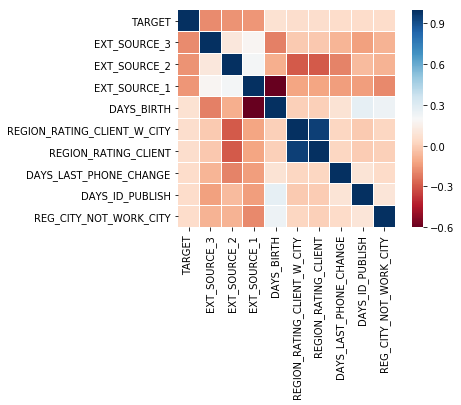

In [37]:
sns.heatmap(df_10.corr() ,  square=True , cmap = colormap ,linecolor = "white",
                        vmax = 1 , annot=False, linewidths=0.1)
plt.show()

DAYS_BIRTHは年齢(借り入れからどれくらい前に産まれたか)を意味することがわかった
年齢によって収入の差によって信頼度が出ることは予想されるので信用に関わってくることは容易に考えられる。

EXT_SOURCE_3                    60965

EXT_SOURCE_2                      660

EXT_SOURCE_1                   173378

とTARGETと相関性の高いEXT_SOURCEに多くの欠損値が含まれていた

## データ分布


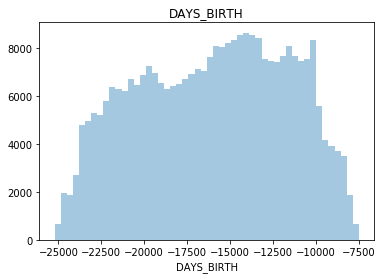

In [38]:
#年齢の分布
#年齢: クライアントが借入申請日の何日前に生まれたか
plt.title("DAYS_BIRTH")
target = df["DAYS_BIRTH"]
display(sns.distplot(target, kde=False, rug=False, bins=50))

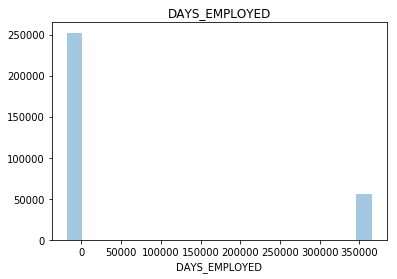

In [39]:
#雇用日数の分布
#雇用日数: クライアントが借入申請日の何日前から現在の仕事を始めたか
target = df["DAYS_EMPLOYED"]
plt.title("DAYS_EMPLOYED")
display(sns.distplot(target, kde=False, rug=False, bins=20))
plt.show()

In [40]:
days_em = pd.concat([df["TARGET"] , df["DAYS_EMPLOYED"]] , axis = 1)
days_em.corr()

,TARGET,DAYS_EMPLOYED
TARGET,1.000000,-0.044932
DAYS_EMPLOYED,-0.044932,1.000000


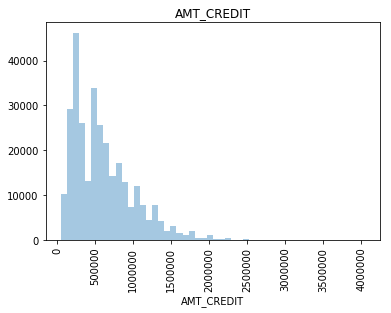

In [41]:
#借金額の分布
target = df["AMT_CREDIT"]
plt.title("AMT_CREDIT")
display(sns.distplot(target, kde=False, rug=False, bins=50))
plt.xticks(rotation = 90)
plt.show()

In [42]:
amt_cre = pd.concat([df["TARGET"] , df["AMT_CREDIT"]] , axis = 1)
amt_cre.corr()

,TARGET,AMT_CREDIT
TARGET,1.000000,-0.030369
AMT_CREDIT,-0.030369,1.000000


年齢が相関性に影響を及ぼす（及ぼすと言っても約0.08だが）ので、雇用日数、借金額と一見信用に関わってくるデータをもとに相関性を出したが、ほとんど相関性が見られなかった。

## 欠損値の多い特徴値

In [65]:
#欠損値の多い特徴値上位１０を抜き出す
missing_df[:10]

,Total,missing_ratio
COMMONAREA_MEDI,214865,0.698723
COMMONAREA_AVG,214865,0.698723
COMMONAREA_MODE,214865,0.698723
NONLIVINGAPARTMENTS_MODE,213514,0.694330
NONLIVINGAPARTMENTS_MEDI,213514,0.694330
NONLIVINGAPARTMENTS_AVG,213514,0.694330
FONDKAPREMONT_MODE,210295,0.683862
LIVINGAPARTMENTS_MEDI,210199,0.683550
LIVINGAPARTMENTS_MODE,210199,0.683550
LIVINGAPARTMENTS_AVG,210199,0.683550


In [77]:
df_missing_columns =  ["COMMONAREA_MEDI" , "COMMONAREA_AVG" , "COMMONAREA_MODE" ,
                                          "NONLIVINGAPARTMENTS_MODE", "NONLIVINGAPARTMENTS_MEDI"  ,
                                          "NONLIVINGAPARTMENTS_AVG","FONDKAPREMONT_MODE" , 
                                          "LIVINGAPARTMENTS_MEDI" , "LIVINGAPARTMENTS_MODE","LIVINGAPARTMENTS_AVG"]

In [90]:
df_miss10 = df.loc[: , df_missing_columns]
df_miss10.isnull().sum()

COMMONAREA_MEDI             214865
COMMONAREA_AVG              214865
COMMONAREA_MODE             214865
NONLIVINGAPARTMENTS_MODE    213514
NONLIVINGAPARTMENTS_MEDI    213514
NONLIVINGAPARTMENTS_AVG     213514
FONDKAPREMONT_MODE          210295
LIVINGAPARTMENTS_MEDI       210199
LIVINGAPARTMENTS_MODE       210199
LIVINGAPARTMENTS_AVG        210199
dtype: int64

In [91]:
df_miss10.corr()

,COMMONAREA_MEDI,COMMONAREA_AVG,COMMONAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAPARTMENTS_AVG,LIVINGAPARTMENTS_MEDI,LIVINGAPARTMENTS_MODE,LIVINGAPARTMENTS_AVG
COMMONAREA_MEDI,1.000000,0.995978,0.979887,0.104548,0.105944,0.105544,0.536985,0.529557,0.533564
COMMONAREA_AVG,0.995978,1.000000,0.977147,0.103457,0.105081,0.105582,0.534454,0.526574,0.533103
COMMONAREA_MODE,0.979887,0.977147,1.000000,0.108027,0.104163,0.102766,0.527031,0.538952,0.523099
NONLIVINGAPARTMENTS_MODE,0.104548,0.103457,0.108027,1.000000,0.978575,0.969370,0.146210,0.144727,0.145175
NONLIVINGAPARTMENTS_MEDI,0.105944,0.105081,0.104163,0.978575,1.000000,0.990768,0.157284,0.142787,0.156555
NONLIVINGAPARTMENTS_AVG,0.105544,0.105582,0.102766,0.969370,0.990768,1.000000,0.156409,0.141176,0.160469
LIVINGAPARTMENTS_MEDI,0.536985,0.534454,0.527031,0.146210,0.157284,0.156409,1.000000,0.975605,0.993825
LIVINGAPARTMENTS_MODE,0.529557,0.526574,0.538952,0.144727,0.142787,0.141176,0.975605,1.000000,0.970117
LIVINGAPARTMENTS_AVG,0.533564,0.533103,0.523099,0.145175,0.156555,0.160469,0.993825,0.970117,1.000000


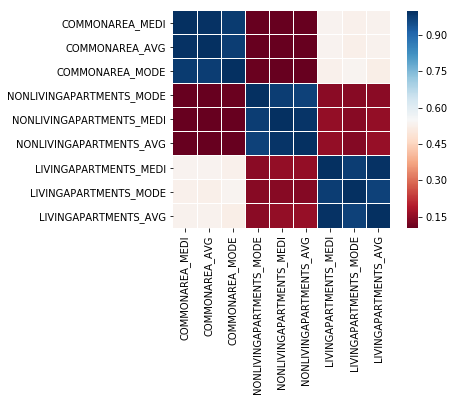

In [92]:
sns.heatmap(df_miss10.corr() ,  square=True , cmap = colormap ,linecolor = "white",
                        vmax = 1 , annot=False, linewidths=0.1)
plt.show()

上記が欠損値の多い特徴値である
似たような名前が多くCOMMONAREA（共通エリア）、NONLIVINGAPARTMENTS（ノンリビングアパート）、LIVINGAPARTMENTS（リビングアパート）
今回はアパートでのデータに欠損値が目立つ形となった

## 考察

目標値TARGETと相関性の高い特徴量を抜き出した結果、別審査機関のクレジットスコアや年齢などが相関性が高いことがわかった
しかし、借金の額や勤続年数は対して目標値との相関性が見受けられなかった。

## まとめ

住宅情報の分析と違い、特徴量の多さ、欠損値の多いデータを扱うのに苦労した
また表面的なデータでの考察しか出来ず、違う視点を持つことや、その視点を形にする術を身に付けて行かなくてはいけないと感じた。
しかし、Kaggleに触れることが出来たこと、わからないながら課題に取り組めたことはよかったと重します